In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import pickle
import re
import yaml

from matplotlib.patches import Patch
from utils.data import get_rec_levels, get_intervention_levels

In [2]:
#filename = '../2020-06-05/neurips20_binary_tracing1/sim_v2_people-1500_days-30_init-0.00333_uptake-0.8415_seed-3000_20200605-090145_785379/tracker_data_n_1500_seed_3000_20200605-091457_.pkl'
#target_filename = os.path.join(os.getenv('SLURM_TMPDIR'), 'RADIANT-RESONANCE-561/sim_v2_people-1500_days-30_init-0.00333_uptake-0.8415_seed-3000_20200605-074029_158019/tracker_data_n_1500_seed_3000_20200605-080830_.pkl')

#filename = '../2020-06-05/neurips20_binary_tracing2/sim_v2_people-1500_days-30_init-0.00333_uptake-0.8415_seed-3000_20200605-092609_709407/tracker_data_n_1500_seed_3000_20200605-094615_.pkl'
#target_filename = os.path.join(os.getenv('SLURM_TMPDIR'), 'RADIANT-RESONANCE-561/sim_v2_people-1500_days-30_init-0.00333_uptake-0.8415_seed-3000_20200605-074029_158019/tracker_data_n_1500_seed_3000_20200605-080830_.pkl')

filename = '../2020-06-05/neurips20_FIERY-YOGURT-575/sim_v2_people-1500_days-30_init-0.00333_uptake-0.8415_seed-3000_20200605-103613_803127/tracker_data_n_1500_seed_3000_20200605-105611_.pkl'
target_filename = os.path.join(os.getenv('SLURM_TMPDIR'), 'RADIANT-RESONANCE-561/sim_v2_people-1500_days-30_init-0.00333_uptake-0.8415_seed-3000_20200605-074029_158019/tracker_data_n_1500_seed_3000_20200605-080830_.pkl')

In [3]:
colors = ['#4CAF50', '#FFEB3B', '#FF9800', '#F44336']

## Binary Digital Tracing 1st order with Heuristic v1 target

In [4]:
rec_levels = get_rec_levels(filename)
intervention_levels = get_intervention_levels(filename)
target_rec_levels = get_rec_levels(target_filename)

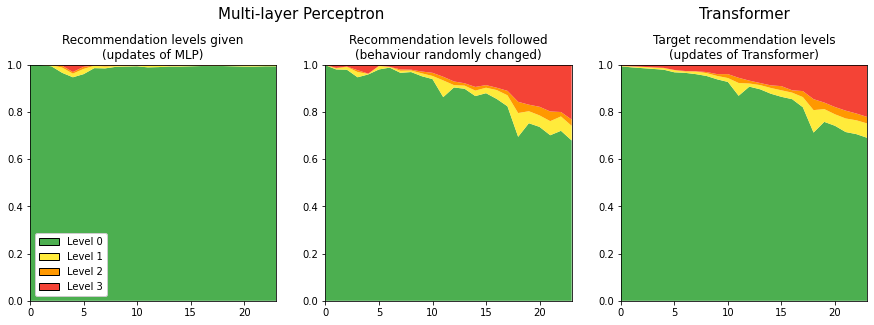

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(top=0.78)

legend_patches = [Patch(facecolor=color, edgecolor='k', label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

axes[0].stackplot(np.arange(rec_levels.shape[1]), rec_levels, colors=colors)
axes[0].margins(0, 0)
#axes[0].set_title('Recommendation levels given\n(updates of BDT1)')
#axes[0].set_title('Recommendation levels given\n(updates of BDT2)')
axes[0].set_title('Recommendation levels given\n(updates of MLP)')
axes[0].legend(handles=legend_patches, loc='lower left', framealpha=1.0)
axis0_we = axes[0].get_window_extent()

axes[1].stackplot(np.arange(intervention_levels.shape[1]), intervention_levels, colors=colors)
axes[1].margins(0, 0)
axes[1].set_title('Recommendation levels followed\n(behaviour randomly changed)')
axis1_we = axes[1].get_window_extent()

axes[2].stackplot(np.arange(target_rec_levels.shape[1]), target_rec_levels, colors=colors)
axes[2].margins(0, 0)
axes[2].set_title('Target recommendation levels\n(updates of Transformer)')
axis2_we = axes[2].get_window_extent()

# Titles
inv = fig.transFigure.inverted()

width_0 = axis0_we.x0 + 0.5 * (axis1_we.x0 + axis1_we.width - axis0_we.x0)
center_0 = inv.transform((width_0, 1))
#plt.figtext(center_0[0], 0.92, 'Binary Digital Tracing - 1st order', va='center', ha='center', size=15)
#plt.figtext(center_0[0], 0.92, 'Binary Digital Tracing - 2nd order', va='center', ha='center', size=15)
plt.figtext(center_0[0], 0.92, 'Multi-layer Perceptron', va='center', ha='center', size=15)

width_1 = axis2_we.x0 + 0.5 * axis2_we.width
center_1 = inv.transform((width_1, 1))
plt.figtext(center_1[0], 0.92, 'Transformer', va='center', ha='center', size=15)

plt.show()

In [6]:
folder = os.path.dirname(filename)
configs = glob.glob(os.path.join(folder, '*.yaml'))
with open(configs[0], 'rb') as f:
    config = yaml.safe_load(f)
print(config['APP_UPTAKE'])

0.8415
